In [1]:
pip install missingno

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import missingno as msno
import matplotlib.pyplot as plt
df_tank = pd.read_csv('Tanks.csv')
df_location = pd.read_csv('Locations.csv')
df_invoice = pd.read_csv('Invoices.csv')
df_fuel_p1 = pd.read_csv('Fuel_Level_Part_1.csv')
df_fuel_p2 = pd.read_csv('Fuel_Level_Part_2.csv')



In [3]:
df_tank.head()

,Tank ID,Tank Location,Tank Number,Tank Type,Tank Capacity
0,T 10,1,1,U,40000
1,T 11,1,2,U,40000
2,T 12,1,3,D,40000
3,T 13,1,4,P,40000
4,T 14,1,5,U,40000


In [4]:
df_location.head()

,Gas Station Location,Gas Station Name,Gas Station Address,Gas Station Latitude,Gas Station Longitude
0,1,EastMount,"386 Upper Gage Ave, Hamilton, ON L8V 4H9, Canada",43.234670,-79.836510
1,2,Eastgate,"75 Centennial Pkwy N E5, Hamilton, ON L8E 2P2,...",43.230700,-79.763930
2,3,Central,"80 Park St N, Hamilton, ON L8R 2M9, Canada",43.260260,-79.870580
3,4,Chedoke,"16 McMaster Ave, Dundas, ON L9H 0A8, Canada",43.261849,-79.937057
4,5,Mountain View,"985 Scenic Dr, Hamilton, ON L9C 1H7, Canada",43.244910,-79.921850


In [5]:
df_invoice.head()

,Invoice Date,Invoice ID,Invoice Gas Station Location,Gross Purchase Cost,Amount Purchased,Fuel Type
0,1/2/2017,10000.0,1,7570.820,6609.600,G
1,1/2/2017,10001.0,1,12491.853,9338.736,D
2,1/2/2017,10002.0,1,NaN,NaN,NaN
3,1/2/2017,10002.0,2,17034.345,13377.824,D
4,1/2/2017,NaN,2,NaN,NaN,NaN


In [6]:
df_fuel_p1.head()

,Tank ID,Fuel Level,Time stamp
0,T 12,27161.0,1/1/2017 0:10
1,T 12,27017.0,1/1/2017 0:25
2,T 12,26934.0,1/1/2017 0:40
3,T12,NaN,1/1/2017 0:45
4,T 12,26786.0,1/1/2017 0:55


In [7]:
df_fuel_p2.head()

,Tank ID,Fuel_Level,Timestamp
0,T 32,22327,1/1/2017 0:05
1,T 20,25215,1/1/2017 0:07
2,T 10,25700,1/1/2017 0:09
3,T 11,25685,1/1/2017 0:10
4,T 14,27138,1/1/2017 0:10


# Solve missing value

<AxesSubplot:>

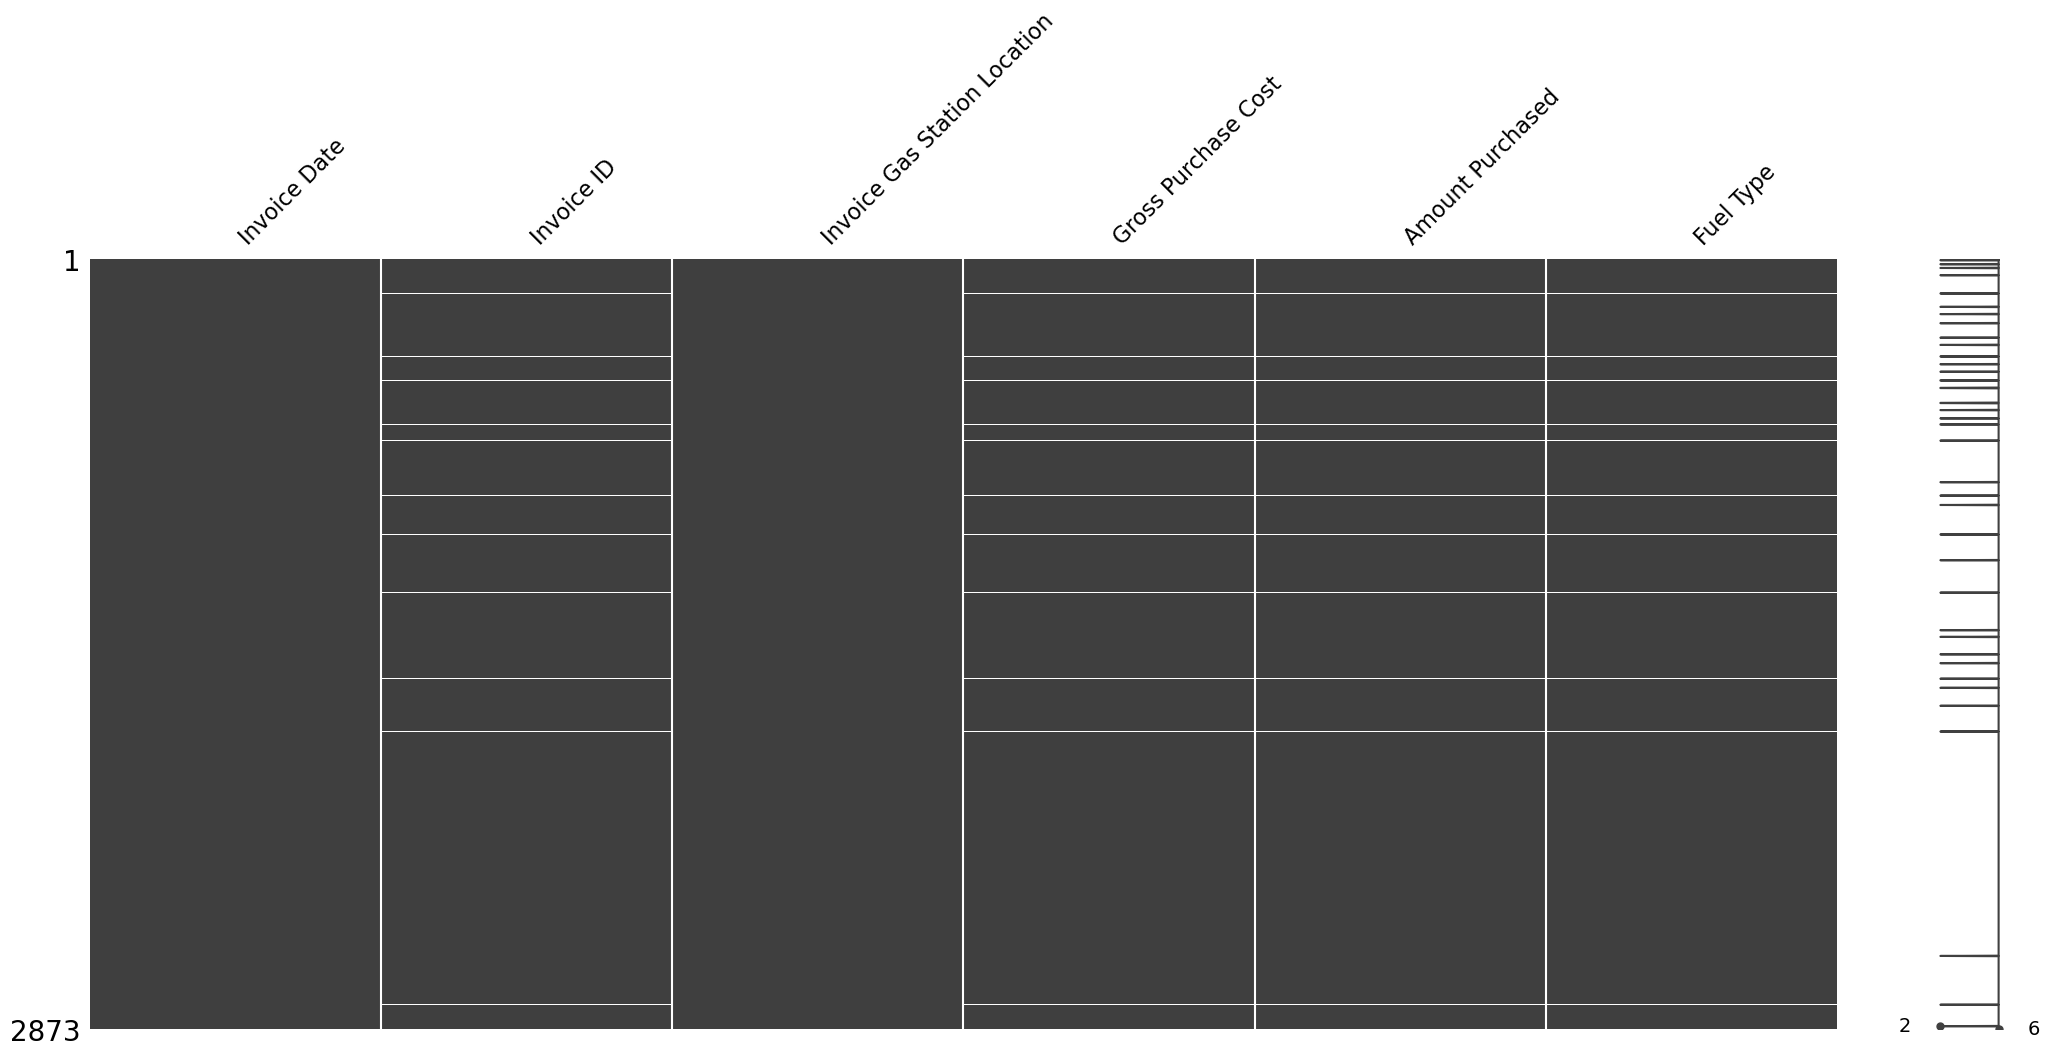

In [8]:
msno.matrix(df_invoice)

In [9]:
print(df_invoice.isna().sum())
df_invoice.dropna(how = 'any',inplace=True)
print('After drop NA')
print(df_invoice.isna().sum())

Invoice Date                     0
Invoice ID                      41
Invoice Gas Station Location     0
Gross Purchase Cost             42
Amount Purchased                42
Fuel Type                       42
dtype: int64
After drop NA
Invoice Date                    0
Invoice ID                      0
Invoice Gas Station Location    0
Gross Purchase Cost             0
Amount Purchased                0
Fuel Type                       0
dtype: int64


In [10]:
print(df_fuel_p1.isna().sum())
df_fuel_p1['Fuel Level'].fillna(method = 'ffill', inplace=True)
print('After fill NA')
print(df_fuel_p1.isna().sum())

Tank ID       0
Fuel Level    2
Time stamp    0
dtype: int64
After fill NA
Tank ID       0
Fuel Level    0
Time stamp    0
dtype: int64


In [11]:
df_fuel_p2.isna().sum()

Tank ID       0
Fuel_Level    0
Timestamp     0
dtype: int64

In [12]:
df_tank.isna().sum()

Tank ID          0
Tank Location    0
Tank Number      0
Tank Type        0
Tank Capacity    0
dtype: int64

In [13]:
df_location.isna().sum()

Gas Station Location     0
Gas Station Name         0
Gas Station Address      0
Gas Station Latitude     0
Gas Station Longitude    0
dtype: int64

### Replace U to G and eliminate tank with fuel type P

In [14]:
df_tank['Tank Type'].replace('U','G',inplace=True)
df_tank.drop(index=3,inplace=True)
df_tank

,Tank ID,Tank Location,Tank Number,Tank Type,Tank Capacity
0,T 10,1,1,G,40000
1,T 11,1,2,G,40000
2,T 12,1,3,D,40000
4,T 14,1,5,G,40000
5,T 15,1,6,D,40000
6,T 16,2,1,G,70000
7,T 17,2,2,D,40000
8,T 18,2,3,G,40000
9,T 19,2,4,D,70000
10,T 20,3,1,G,30000


#### There are two rows for tank_id to be T12, need to change it to T 12

In [15]:
Tank_id=df_fuel_p1['Tank ID']
for i in Tank_id:
    lines = i.split()
    if(len(lines)<2):
        print(i)

T12
T12


In [16]:
df_fuel_p1['Tank ID'].replace('T12','T 12',inplace=True)

In [17]:
Tank_id=df_fuel_p1['Tank ID']
for i in Tank_id:
    lines = i.split()
    if(len(lines)<2):
        print(i)

# Explore Dataset

# Merge Location with Invoice, get price of fuel

In [18]:
df_invoice = pd.merge(df_invoice,df_location,left_on='Invoice Gas Station Location',right_on='Gas Station Location',how='left')
df_invoice.drop(columns=['Gas Station Location','Gas Station Latitude','Gas Station Longitude'],inplace=True)
df_invoice['Price']=df_invoice['Gross Purchase Cost']/df_invoice['Amount Purchased']
df_invoice

,Invoice Date,Invoice ID,Invoice Gas Station Location,Gross Purchase Cost,Amount Purchased,Fuel Type,Gas Station Name,Gas Station Address,Price
0,1/2/2017,10000.0,1,7570.82000,6609.600,G,EastMount,"386 Upper Gage Ave, Hamilton, ON L8V 4H9, Canada",1.145428
1,1/2/2017,10001.0,1,12491.85300,9338.736,D,EastMount,"386 Upper Gage Ave, Hamilton, ON L8V 4H9, Canada",1.337639
2,1/2/2017,10002.0,2,17034.34500,13377.824,D,Eastgate,"75 Centennial Pkwy N E5, Hamilton, ON L8E 2P2,...",1.273327
3,1/2/2017,10003.0,2,12616.77153,9432.112,D,Eastgate,"75 Centennial Pkwy N E5, Hamilton, ON L8E 2P2,...",1.337640
4,1/2/2017,10004.0,4,11363.80082,9139.200,D,Chedoke,"16 McMaster Ave, Dundas, ON L9H 0A8, Canada",1.243413
...,...,...,...,...,...,...,...,...,...
2826,8/14/2019,12826.0,2,14418.62669,8182.960,D,Eastgate,"75 Centennial Pkwy N E5, Hamilton, ON L8E 2P2,...",1.762031
2827,8/14/2019,12827.0,2,7570.82000,4296.640,D,Eastgate,"75 Centennial Pkwy N E5, Hamilton, ON L8E 2P2,...",1.762033
2828,8/14/2019,12828.0,4,8706.44300,6352.416,G,Chedoke,"16 McMaster Ave, Dundas, ON L9H 0A8, Canada",1.370572
2829,8/14/2019,12829.0,4,13252.72041,7521.264,D,Chedoke,"16 McMaster Ave, Dundas, ON L9H 0A8, Canada",1.762034


### Visualize the price level for different station

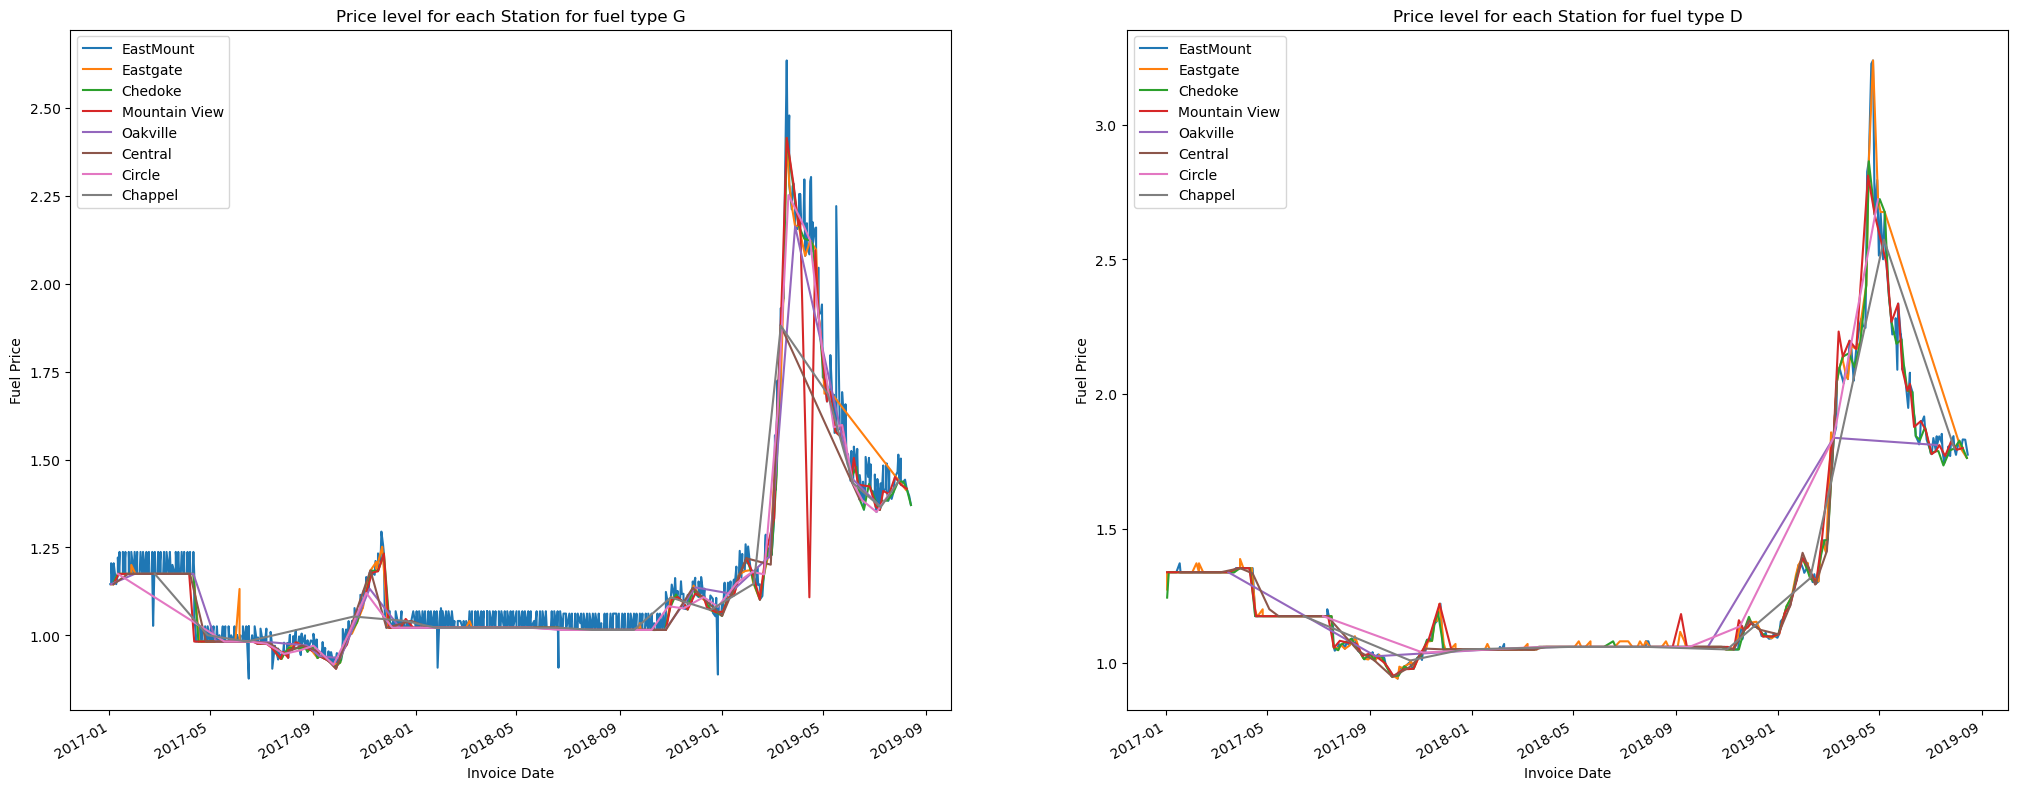

In [19]:
df_invoice['Invoice Date']=pd.to_datetime(df_invoice['Invoice Date'])
fig,ax = plt.subplots(ncols=2)
fig.set_figheight(10)
fig.set_figwidth(25)
for station in df_invoice['Gas Station Name'].unique():
    price_for_station = df_invoice[(df_invoice['Fuel Type']=='G') & (df_invoice['Gas Station Name']==station)]
    ax[0].plot(price_for_station['Invoice Date'],price_for_station['Price'])
for station in df_invoice['Gas Station Name'].unique():
    price_for_station = df_invoice[(df_invoice['Fuel Type']=='D') & (df_invoice['Gas Station Name']==station)]
    ax[1].plot(price_for_station['Invoice Date'],price_for_station['Price'])
fig.autofmt_xdate()
ax[0].set(xlabel='Invoice Date',ylabel='Fuel Price',title='Price level for each Station for fuel type G')
ax[1].set(xlabel='Invoice Date',ylabel='Fuel Price',title='Price level for each Station for fuel type D')
ax[0].legend(df_invoice['Gas Station Name'].unique())
ax[1].legend(df_invoice['Gas Station Name'].unique())

### Check Invoice situation

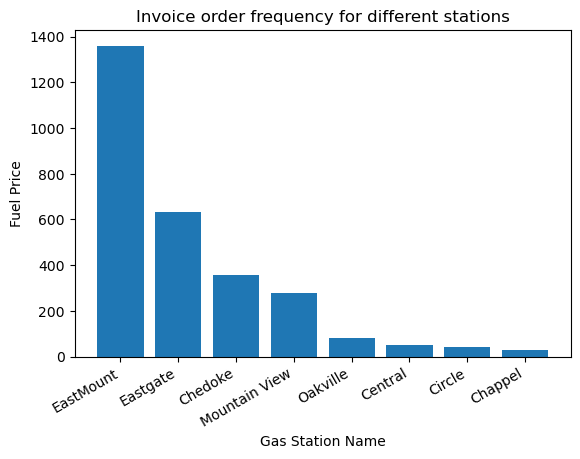

In [20]:
fig,ax = plt.subplots()
ax.bar(df_invoice['Gas Station Name'].unique(),df_invoice['Invoice Gas Station Location'].value_counts())
ax.set(xlabel='Gas Station Name',ylabel='Fuel Price',title='Invoice order frequency for different stations')
fig.autofmt_xdate()


## Visualize invoice order distribution

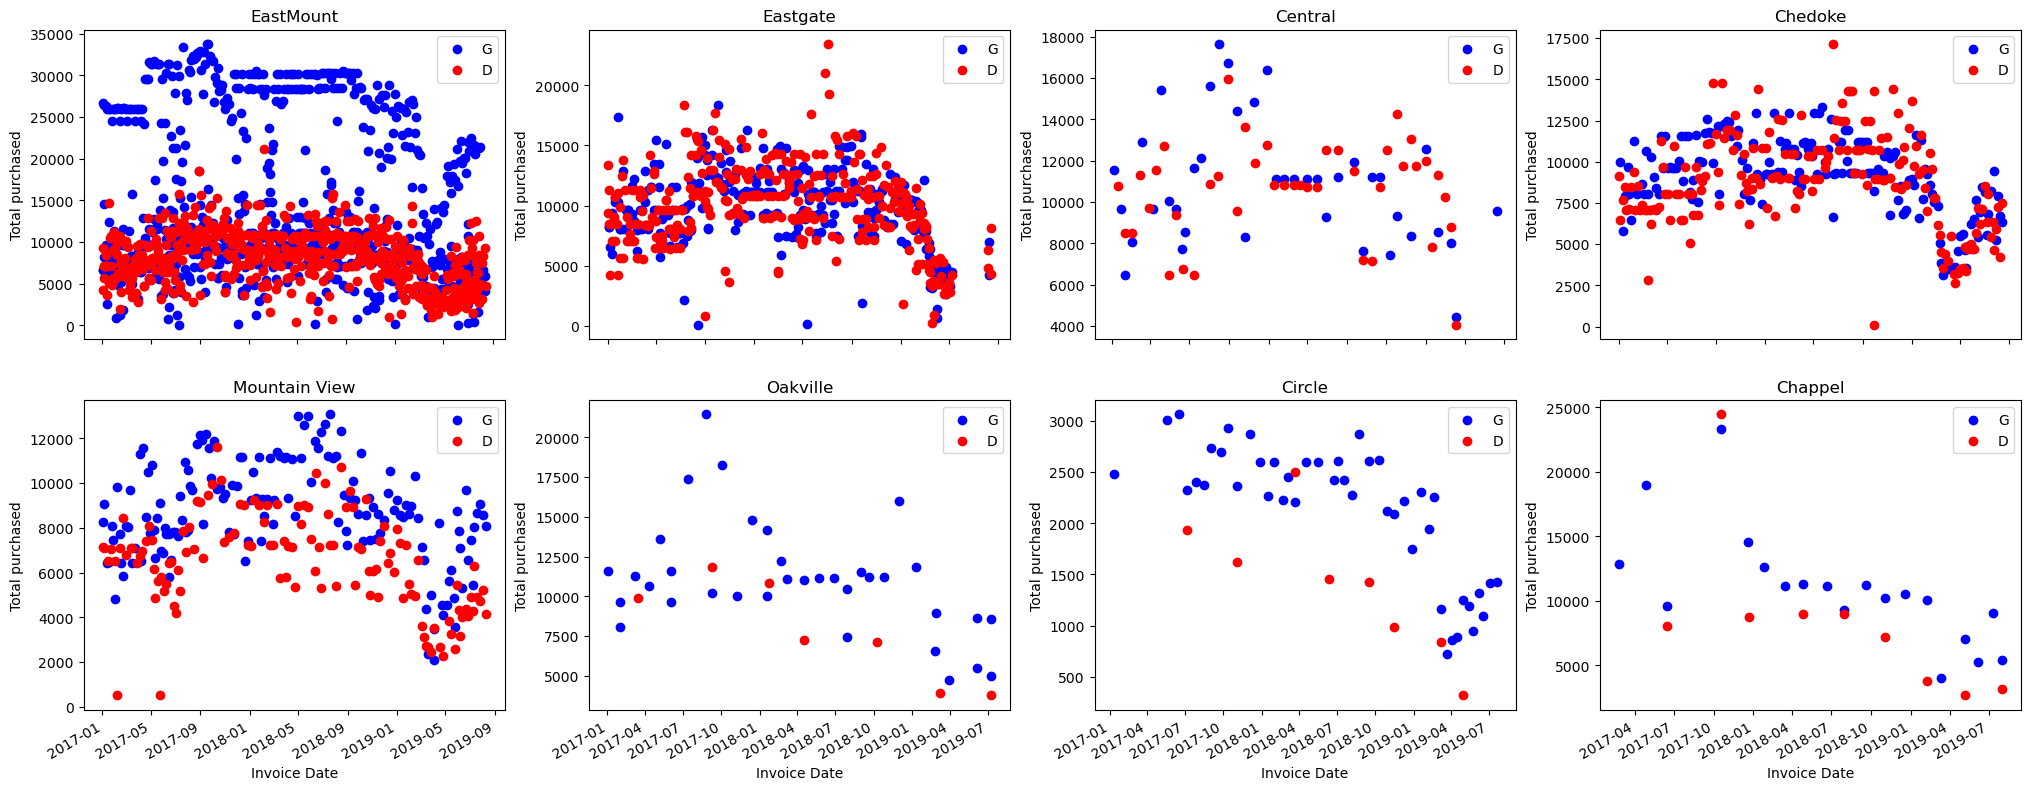

In [21]:
fig,ax = plt.subplots(nrows=2,ncols=4)
fig.set_figheight(10)
fig.set_figwidth(25)
for i in range(8):
    row = int(i/4)
    col = i%4
    Location_G = df_invoice[(df_invoice['Invoice Gas Station Location']==i+1) & (df_invoice['Fuel Type']=='G')]
    Location_D = df_invoice[(df_invoice['Invoice Gas Station Location']==i+1) & (df_invoice['Fuel Type']=='D')]
    ax[row,col].scatter(Location_G['Invoice Date'],Location_G['Amount Purchased'],color='blue')
    ax[row,col].scatter(Location_D['Invoice Date'],Location_D['Amount Purchased'],color='red')
    ax[row,col].set(xlabel='Invoice Date',ylabel='Total purchased',title = list(df_invoice[df_invoice['Invoice Gas Station Location']==i+1]['Gas Station Name'])[0])
    ax[row,col].legend(['G','D'])
fig.autofmt_xdate()

## concat two fuel level file and change data type

In [22]:
df_fuel_p2.columns=['Tank ID','Fuel Level','Time stamp']
df_fuel=pd.concat([df_fuel_p1,df_fuel_p2])
df_fuel.reset_index(inplace=True)
df_fuel=df_fuel[['Tank ID','Fuel Level','Time stamp']]
df_fuel['Time stamp'] = pd.to_datetime(df_fuel['Time stamp'],format='%m/%d/%Y %H:%M')

## Merge tank and fuel to visualize fuel level situation

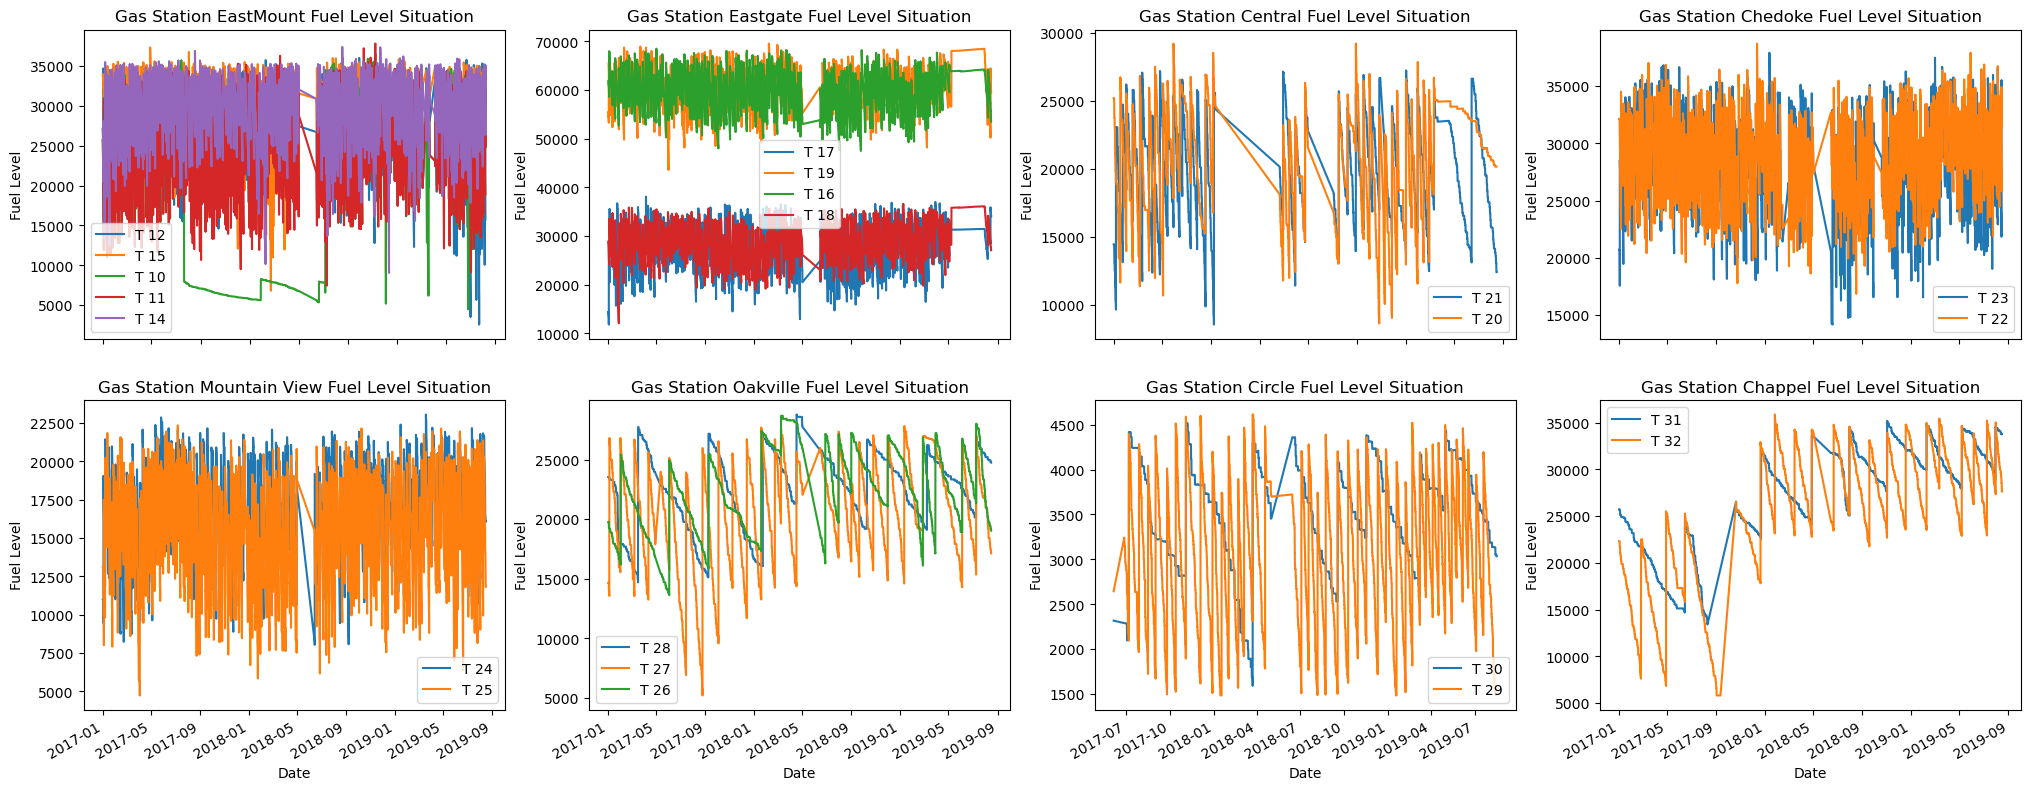

In [23]:
df_fuel_station = pd.merge(df_fuel,df_tank,on='Tank ID',how='left')
df_fuel_station = pd.merge(df_fuel_station,df_location,left_on='Tank Location',right_on='Gas Station Location',how='left')
fig,ax = plt.subplots(nrows=2,ncols=4)
fig.set_figheight(10)
fig.set_figwidth(25)
for i in range(8):
    row = int(i/4)
    col = i%4
    tank_list = df_fuel_station[df_fuel_station['Gas Station Location']==i+1]['Tank ID'].unique()
    for tank in tank_list:
        tank_fuel = df_fuel_station[(df_fuel_station['Gas Station Location']==i+1) & (df_fuel_station['Tank ID']==tank)]
        ax[row,col].plot(tank_fuel['Time stamp'],tank_fuel['Fuel Level'])
    ax[row,col].set(xlabel='Date',ylabel='Fuel Level',title='Gas Station '+list(df_fuel_station[df_fuel_station['Gas Station Location']==i+1]['Gas Station Name'])[0]+' Fuel Level Situation')
    ax[row,col].legend(tank_list)
fig.autofmt_xdate()

# Solve Business question

## Get how customer buy these fuel from different tanks

In [24]:
max_fuel=dict()
tank_id_list = []
fuel_sold_list = []
time_stamp_list = []
for i in range(len(df_fuel.index)):
    if df_fuel.loc[i,'Tank ID'] not in max_fuel.keys():
        max_fuel[df_fuel.loc[i,'Tank ID']]=df_fuel.loc[i,'Fuel Level']
    else:
        if max_fuel[df_fuel.loc[i,'Tank ID']]>df_fuel.loc[i,'Fuel Level']:
            tank_id_list.append(df_fuel.loc[i,'Tank ID'])
            fuel_sold_list.append(max_fuel[df_fuel.loc[i,'Tank ID']]-df_fuel.loc[i,'Fuel Level'])
            time_stamp_list.append(df_fuel.loc[i,'Time stamp'])
        max_fuel[df_fuel.loc[i,'Tank ID']]=df_fuel.loc[i,'Fuel Level']
customer_purchase = dict()
customer_purchase['Tank ID']=tank_id_list
customer_purchase['Sold Fuel']=fuel_sold_list
customer_purchase['Time stamp']=time_stamp_list
customer_usage = pd.DataFrame(customer_purchase,columns=['Tank ID','Sold Fuel','Time stamp'])
customer_usage

,Tank ID,Sold Fuel,Time stamp
0,T 12,144.0,2017-01-01 00:25:00
1,T 12,83.0,2017-01-01 00:40:00
2,T 12,148.0,2017-01-01 00:55:00
3,T 12,38.0,2017-01-01 01:10:00
4,T 12,90.0,2017-01-01 01:25:00
...,...,...,...
408643,T 16,4.0,2019-08-15 22:12:00
408644,T 25,42.0,2019-08-15 22:14:00
408645,T 16,4.0,2019-08-15 22:42:00
408646,T 16,49.0,2019-08-15 23:27:00


## Merge Customer_usage with tank, location and visualize it

In [25]:
customer_usage = pd.merge(customer_usage,df_tank,on = 'Tank ID',how='inner')
customer_usage = pd.merge(customer_usage,df_location, left_on='Tank Location',right_on='Gas Station Location')
customer_usage

,Tank ID,Sold Fuel,Time stamp,Tank Location,Tank Number,Tank Type,Tank Capacity,Gas Station Location,Gas Station Name,Gas Station Address,Gas Station Latitude,Gas Station Longitude
0,T 12,144.0,2017-01-01 00:25:00,1,3,D,40000,1,EastMount,"386 Upper Gage Ave, Hamilton, ON L8V 4H9, Canada",43.234670,-79.836510
1,T 12,83.0,2017-01-01 00:40:00,1,3,D,40000,1,EastMount,"386 Upper Gage Ave, Hamilton, ON L8V 4H9, Canada",43.234670,-79.836510
2,T 12,148.0,2017-01-01 00:55:00,1,3,D,40000,1,EastMount,"386 Upper Gage Ave, Hamilton, ON L8V 4H9, Canada",43.234670,-79.836510
3,T 12,38.0,2017-01-01 01:10:00,1,3,D,40000,1,EastMount,"386 Upper Gage Ave, Hamilton, ON L8V 4H9, Canada",43.234670,-79.836510
4,T 12,90.0,2017-01-01 01:25:00,1,3,D,40000,1,EastMount,"386 Upper Gage Ave, Hamilton, ON L8V 4H9, Canada",43.234670,-79.836510
...,...,...,...,...,...,...,...,...,...,...,...,...
389032,T 32,38.0,2019-08-15 11:53:00,8,2,G,40000,8,Chappel,"1530 Upper Sherman Ave, Hamilton, ON L8W 1C5, ...",38.875955,-77.024461
389033,T 32,23.0,2019-08-15 12:08:00,8,2,G,40000,8,Chappel,"1530 Upper Sherman Ave, Hamilton, ON L8W 1C5, ...",38.875955,-77.024461
389034,T 32,49.0,2019-08-15 12:23:00,8,2,G,40000,8,Chappel,"1530 Upper Sherman Ave, Hamilton, ON L8W 1C5, ...",38.875955,-77.024461
389035,T 32,50.0,2019-08-15 15:53:00,8,2,G,40000,8,Chappel,"1530 Upper Sherman Ave, Hamilton, ON L8W 1C5, ...",38.875955,-77.024461


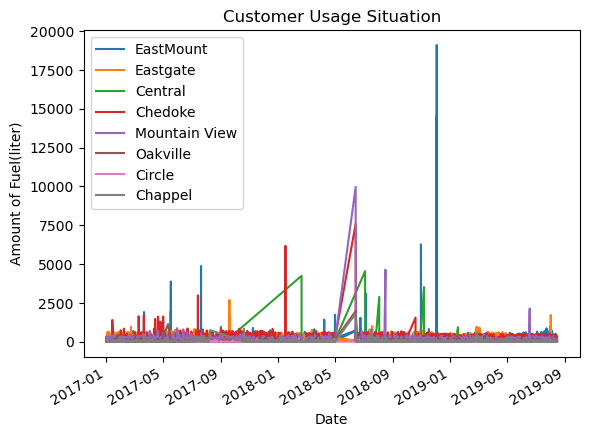

In [26]:
fig,ax = plt.subplots()
for i in customer_usage['Gas Station Name'].unique():
        usage_station = customer_usage[(customer_usage['Gas Station Name']==i) & (customer_usage['Tank Type']=='D')]
        ax.plot(usage_station['Time stamp'],usage_station['Sold Fuel'])
fig.autofmt_xdate()
ax.set(xlabel='Date',ylabel='Amount of Fuel(liter)',title='Customer Usage Situation')
ax.legend(customer_usage['Gas Station Name'].unique())

## We can see there is extreme situation on the customer usage, use pivot_table to find these extreme situation

In [27]:
usage_table = pd.pivot_table(customer_usage,columns=['Gas Station Name','Tank Type'],values='Sold Fuel',aggfunc='max')
usage_table

Gas Station Name Central         Chappel         Chedoke         Circle  \
Tank Type              D       G       D       G       D       G      D   
Sold Fuel         4543.0  6814.0  1795.0  9403.0  7590.0  1938.0  206.0   

Gas Station Name        EastMount          Eastgate         Mountain View  \
Tank Type             G         D        G        D       G             D   
Sold Fuel         176.0   19102.0  17943.0   2684.0  3092.0        9975.0   

Gas Station Name         Oakville          
Tank Type              G        D       G  
Sold Fuel         4270.0   1972.0  7154.0

## Set our standard of inventory management policy

In [28]:
df_standard=df_tank.sort_values(['Tank Location','Tank Type'])
df_standard=pd.merge(df_standard,df_location,left_on='Tank Location',right_on='Gas Station Location',how='left')
df_standard=df_standard[['Tank ID','Tank Location','Tank Type','Tank Capacity','Gas Station Name']]
safety_bound = [20000,20000,20000,20000,20000,10000,10000,10000,10000,10000,10000,10000,10000,15000,10000,10000,10000,10000,1000,1000,10000,15000]
injection_level = [35000,35000,35000,35000,35000,35000,35000,35000,35000,25000,25000,35000,35000,25000,25000,25000,25000,25000,5000,5000,35000,40000]
df_standard['Safety Bound']=safety_bound
df_standard['Injection Level']=injection_level
df_standard.index=df_standard['Tank ID']
df_standard.drop(columns='Tank ID',inplace=True)
df_standard

,Tank Location,Tank Type,Tank Capacity,Gas Station Name,Safety Bound,Injection Level
Tank ID,,,,,,
T 12,1,D,40000,EastMount,20000,35000
T 15,1,D,40000,EastMount,20000,35000
T 10,1,G,40000,EastMount,20000,35000
T 11,1,G,40000,EastMount,20000,35000
T 14,1,G,40000,EastMount,20000,35000
T 17,2,D,40000,Eastgate,10000,35000
T 19,2,D,70000,Eastgate,10000,35000
T 16,2,G,70000,Eastgate,10000,35000
T 18,2,G,40000,Eastgate,10000,35000


## Get the average price of each date for different fuel types

In [29]:
price_day = df_invoice[['Invoice Date','Fuel Type','Price']]
price_day = pd.DataFrame(price_day.groupby(['Invoice Date','Fuel Type'])['Price'].mean())
price_day.reset_index(inplace=True)
price_day

,Invoice Date,Fuel Type,Price
0,2017-01-02,D,1.305932
1,2017-01-02,G,1.145428
2,2017-01-03,D,1.337640
3,2017-01-03,G,1.155334
4,2017-01-04,D,1.337639
...,...,...,...
1192,2019-08-12,D,1.830186
1193,2019-08-12,G,1.395878
1194,2019-08-14,D,1.762032
1195,2019-08-14,G,1.370573


## Normalize customer_usage time to match it with price_day

In [30]:
customer_usage['Normalized_time']=customer_usage['Time stamp'].dt.floor('d')
customer_usage

,Tank ID,Sold Fuel,Time stamp,Tank Location,Tank Number,Tank Type,Tank Capacity,Gas Station Location,Gas Station Name,Gas Station Address,Gas Station Latitude,Gas Station Longitude,Normalized_time
0,T 12,144.0,2017-01-01 00:25:00,1,3,D,40000,1,EastMount,"386 Upper Gage Ave, Hamilton, ON L8V 4H9, Canada",43.234670,-79.836510,2017-01-01
1,T 12,83.0,2017-01-01 00:40:00,1,3,D,40000,1,EastMount,"386 Upper Gage Ave, Hamilton, ON L8V 4H9, Canada",43.234670,-79.836510,2017-01-01
2,T 12,148.0,2017-01-01 00:55:00,1,3,D,40000,1,EastMount,"386 Upper Gage Ave, Hamilton, ON L8V 4H9, Canada",43.234670,-79.836510,2017-01-01
3,T 12,38.0,2017-01-01 01:10:00,1,3,D,40000,1,EastMount,"386 Upper Gage Ave, Hamilton, ON L8V 4H9, Canada",43.234670,-79.836510,2017-01-01
4,T 12,90.0,2017-01-01 01:25:00,1,3,D,40000,1,EastMount,"386 Upper Gage Ave, Hamilton, ON L8V 4H9, Canada",43.234670,-79.836510,2017-01-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...
389032,T 32,38.0,2019-08-15 11:53:00,8,2,G,40000,8,Chappel,"1530 Upper Sherman Ave, Hamilton, ON L8W 1C5, ...",38.875955,-77.024461,2019-08-15
389033,T 32,23.0,2019-08-15 12:08:00,8,2,G,40000,8,Chappel,"1530 Upper Sherman Ave, Hamilton, ON L8W 1C5, ...",38.875955,-77.024461,2019-08-15
389034,T 32,49.0,2019-08-15 12:23:00,8,2,G,40000,8,Chappel,"1530 Upper Sherman Ave, Hamilton, ON L8W 1C5, ...",38.875955,-77.024461,2019-08-15
389035,T 32,50.0,2019-08-15 15:53:00,8,2,G,40000,8,Chappel,"1530 Upper Sherman Ave, Hamilton, ON L8W 1C5, ...",38.875955,-77.024461,2019-08-15


## Get initial inventory and perform simulation

In [31]:
import datetime
inventory = dict()
for tank_id in df_fuel['Tank ID'].unique():
    inventory[tank_id]=list(df_fuel[df_fuel['Tank ID']==tank_id]['Fuel Level'])[0]
new_invoice = pd.DataFrame(columns=['Invoice Date','Invoice ID','Invoice Gas Station Location','Gross Purchase Cost','Amount Purchased','Fuel Type'])
invoice_id=10000
total_money = 0
for i in range(len(customer_usage.index)):
    tank_id=customer_usage.loc[i,'Tank ID']
    inventory[tank_id]-=customer_usage.loc[i,'Sold Fuel']
    if(inventory[tank_id]<0):
        print('emergent')
        break
    if inventory[tank_id]<df_standard.loc[tank_id,'Safety Bound']:
        location = df_standard.loc[tank_id,'Tank Location']
        fuel_type = df_standard.loc[tank_id,'Tank Type']
        tank_list = list(df_standard[(df_standard['Tank Location']==location) & (df_standard['Tank Type']==fuel_type)].index)
        amount_purchased = 0
        for tank in tank_list:
            amount_purchased += (df_standard.loc[tank,'Injection Level']-inventory[tank])
            inventory[tank]=df_standard.loc[tank,'Injection Level']
        time = customer_usage.loc[i,'Normalized_time']
        price = list(price_day[(price_day['Invoice Date']==time) & (price_day['Fuel Type']==fuel_type)]['Price'])
        if len(price)>0:
            price=price[0]
        else:
            continue
        if amount_purchased>=15000 and amount_purchased<25000:
            price-=0.02
        elif amount_purchased>=25000 and amount_purchased<40000:
            price-=0.03
        elif amount_purchased>40000:
            price-=0.04
        money_spent = amount_purchased*price
        total_money+=money_spent
        new_invoice.loc[len(new_invoice.index)]=[customer_usage.loc[i,'Normalized_time'],invoice_id,customer_usage.loc[i,'Tank Location'],money_spent,amount_purchased,fuel_type]
        invoice_id+=1

In [32]:
print(f'new cost {total_money:.2f}$')
print(f"old cost {df_invoice['Gross Purchase Cost'].sum():.2f}$")
print(f"saving cost {(df_invoice['Gross Purchase Cost'].sum()-total_money):.2f}$")

new cost 26617897.05$
old cost 33298726.25$
saving cost 6680829.20$


## Merge new invoice with location and visualize new distribution

In [33]:
new_invoice = pd.merge(new_invoice,df_location,left_on='Invoice Gas Station Location',right_on='Gas Station Location',how='left')
new_invoice.drop(columns=['Gas Station Location','Gas Station Latitude','Gas Station Longitude'],inplace=True)
new_invoice

,Invoice Date,Invoice ID,Invoice Gas Station Location,Gross Purchase Cost,Amount Purchased,Fuel Type,Gas Station Name,Gas Station Address
0,2017-01-02,10000,1,20690.639365,16090.0,D,EastMount,"386 Upper Gage Ave, Hamilton, ON L8V 4H9, Canada"
1,2017-01-04,10001,1,19779.073146,15011.0,D,EastMount,"386 Upper Gage Ave, Hamilton, ON L8V 4H9, Canada"
2,2017-01-13,10002,1,19773.744737,15007.0,D,EastMount,"386 Upper Gage Ave, Hamilton, ON L8V 4H9, Canada"
3,2017-01-16,10003,1,19780.392847,15012.0,D,EastMount,"386 Upper Gage Ave, Hamilton, ON L8V 4H9, Canada"
4,2017-01-23,10004,1,19946.413402,15138.0,D,EastMount,"386 Upper Gage Ave, Hamilton, ON L8V 4H9, Canada"
...,...,...,...,...,...,...,...,...
1324,2018-08-07,11324,8,25039.379869,25023.0,G,Chappel,"1530 Upper Sherman Ave, Hamilton, ON L8W 1C5, ..."
1325,2018-11-13,11325,8,28128.872865,25035.0,G,Chappel,"1530 Upper Sherman Ave, Hamilton, ON L8W 1C5, ..."
1326,2019-03-01,11326,8,30188.044684,25044.0,G,Chappel,"1530 Upper Sherman Ave, Hamilton, ON L8W 1C5, ..."
1327,2019-06-03,11327,8,35239.918713,25001.0,G,Chappel,"1530 Upper Sherman Ave, Hamilton, ON L8W 1C5, ..."


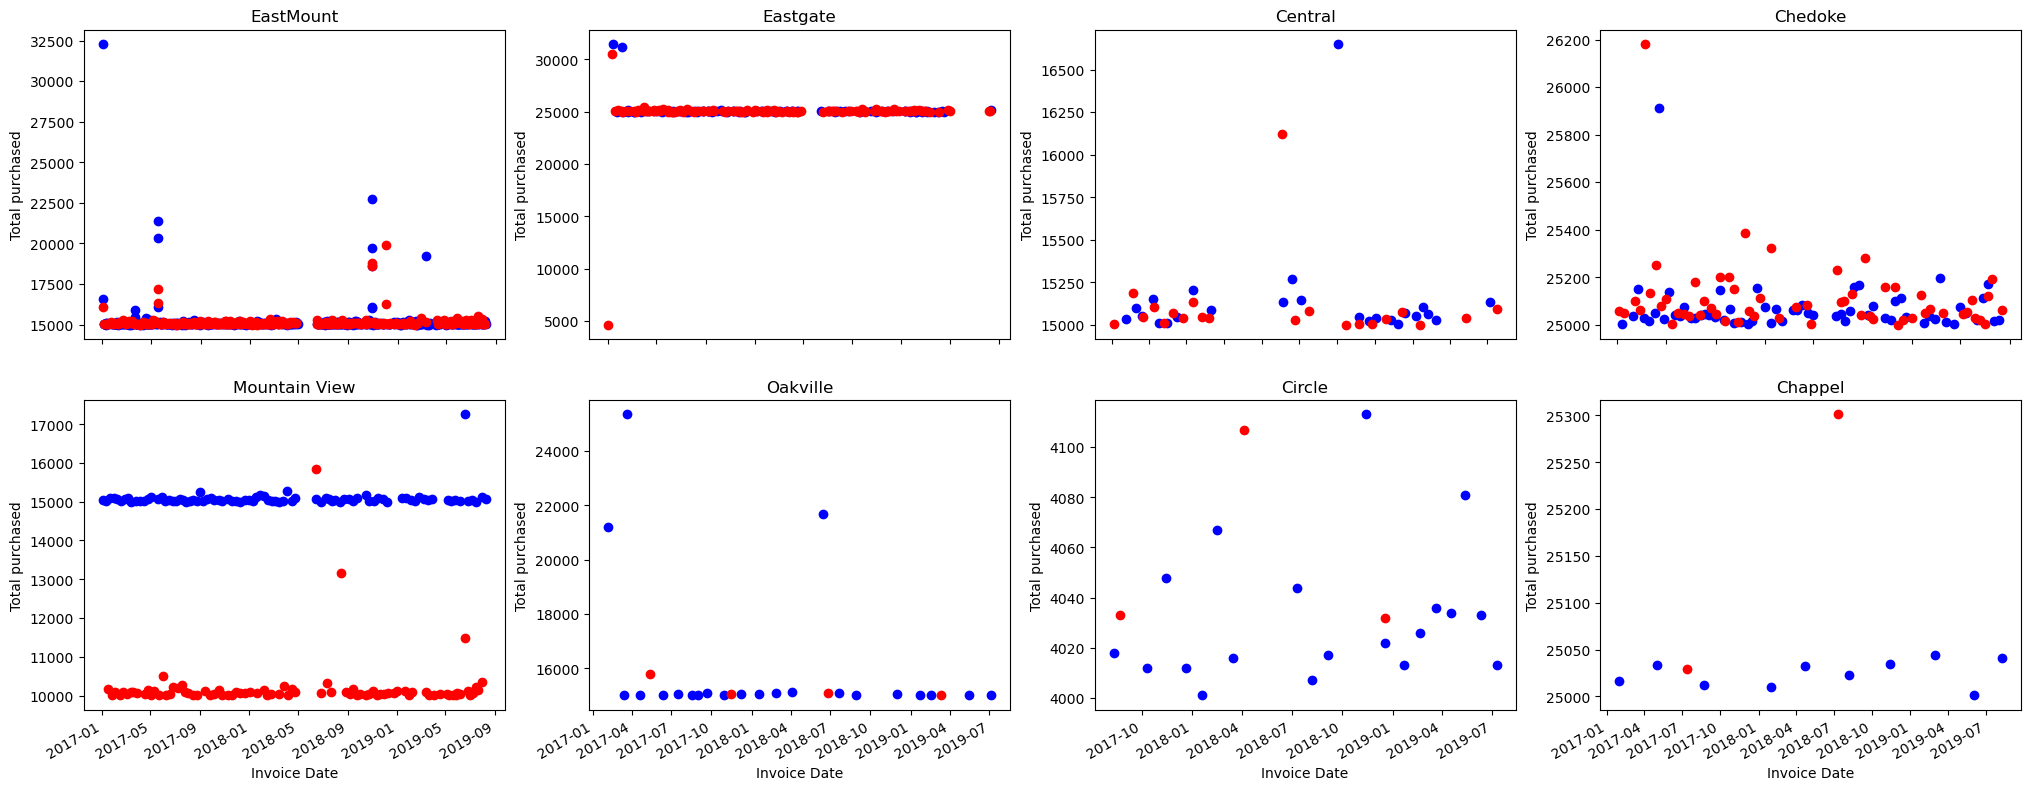

In [34]:
fig,ax = plt.subplots(nrows=2,ncols=4)
fig.set_figheight(10)
fig.set_figwidth(25)
for i in range(8):
    row = int(i/4)
    col = i%4
    Location_G = new_invoice[(new_invoice['Invoice Gas Station Location']==i+1) & (new_invoice['Fuel Type']=='G')]
    Location_D = new_invoice[(new_invoice['Invoice Gas Station Location']==i+1) & (new_invoice['Fuel Type']=='D')]
    ax[row,col].scatter(Location_G['Invoice Date'],Location_G['Amount Purchased'],color='blue')
    ax[row,col].scatter(Location_D['Invoice Date'],Location_D['Amount Purchased'],color='red')
    ax[row,col].set(xlabel='Invoice Date',ylabel='Total purchased',title = list(new_invoice[new_invoice['Invoice Gas Station Location']==i+1]['Gas Station Name'])[0])
fig.autofmt_xdate()

## Check remaining fuel level

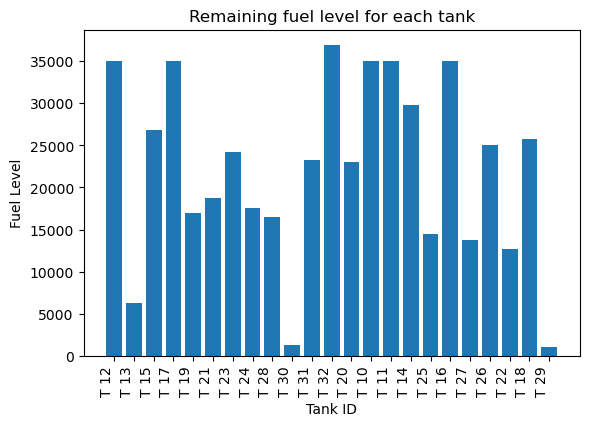

In [35]:
remaining_fuel=pd.DataFrame(index=inventory.keys(),columns=['Fuel Level'])
remaining_fuel['Fuel Level']=inventory.values()
fig,ax=plt.subplots()
plt.bar(remaining_fuel.index,remaining_fuel['Fuel Level'])
fig.autofmt_xdate(rotation=90)
ax.set(xlabel='Tank ID',ylabel='Fuel Level',title='Remaining fuel level for each tank');